In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [34]:
# Import data

df = pd.read_csv("./data/Healthcare-Diabetes.csv")

In [35]:
# Get a preview of the data

df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# Remove ID since we won't use it.

# Remove SkinThickness, Insulin, & DiabetesPedigreeFunction
# since they are features that can only be measured with proffesional help.

df = df.drop(columns = ['Id'])
df = df.drop(columns = ['SkinThickness'])
df = df.drop(columns = ['Insulin'])
df = df.drop(columns = ['DiabetesPedigreeFunction'])
df = df.drop(columns = ['Glucose'])

In [37]:
# Check for null data and the features data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2768 non-null   int64  
 1   BloodPressure  2768 non-null   int64  
 2   BMI            2768 non-null   float64
 3   Age            2768 non-null   int64  
 4   Outcome        2768 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 108.3 KB


<Axes: xlabel='Outcome'>

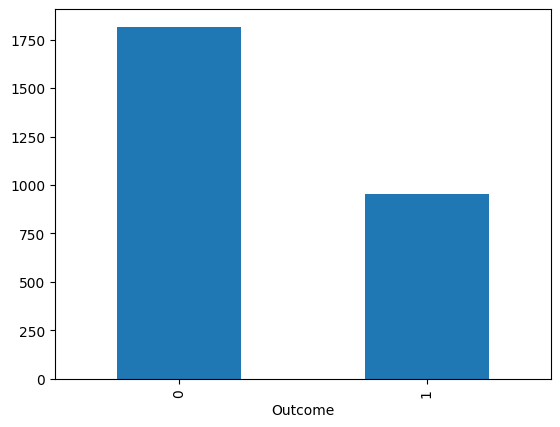

In [38]:
# Check for data imbalance

df.Outcome.value_counts().plot.bar()

# v 0 label count is much more than 1
# We'll need to rebalance the dataset

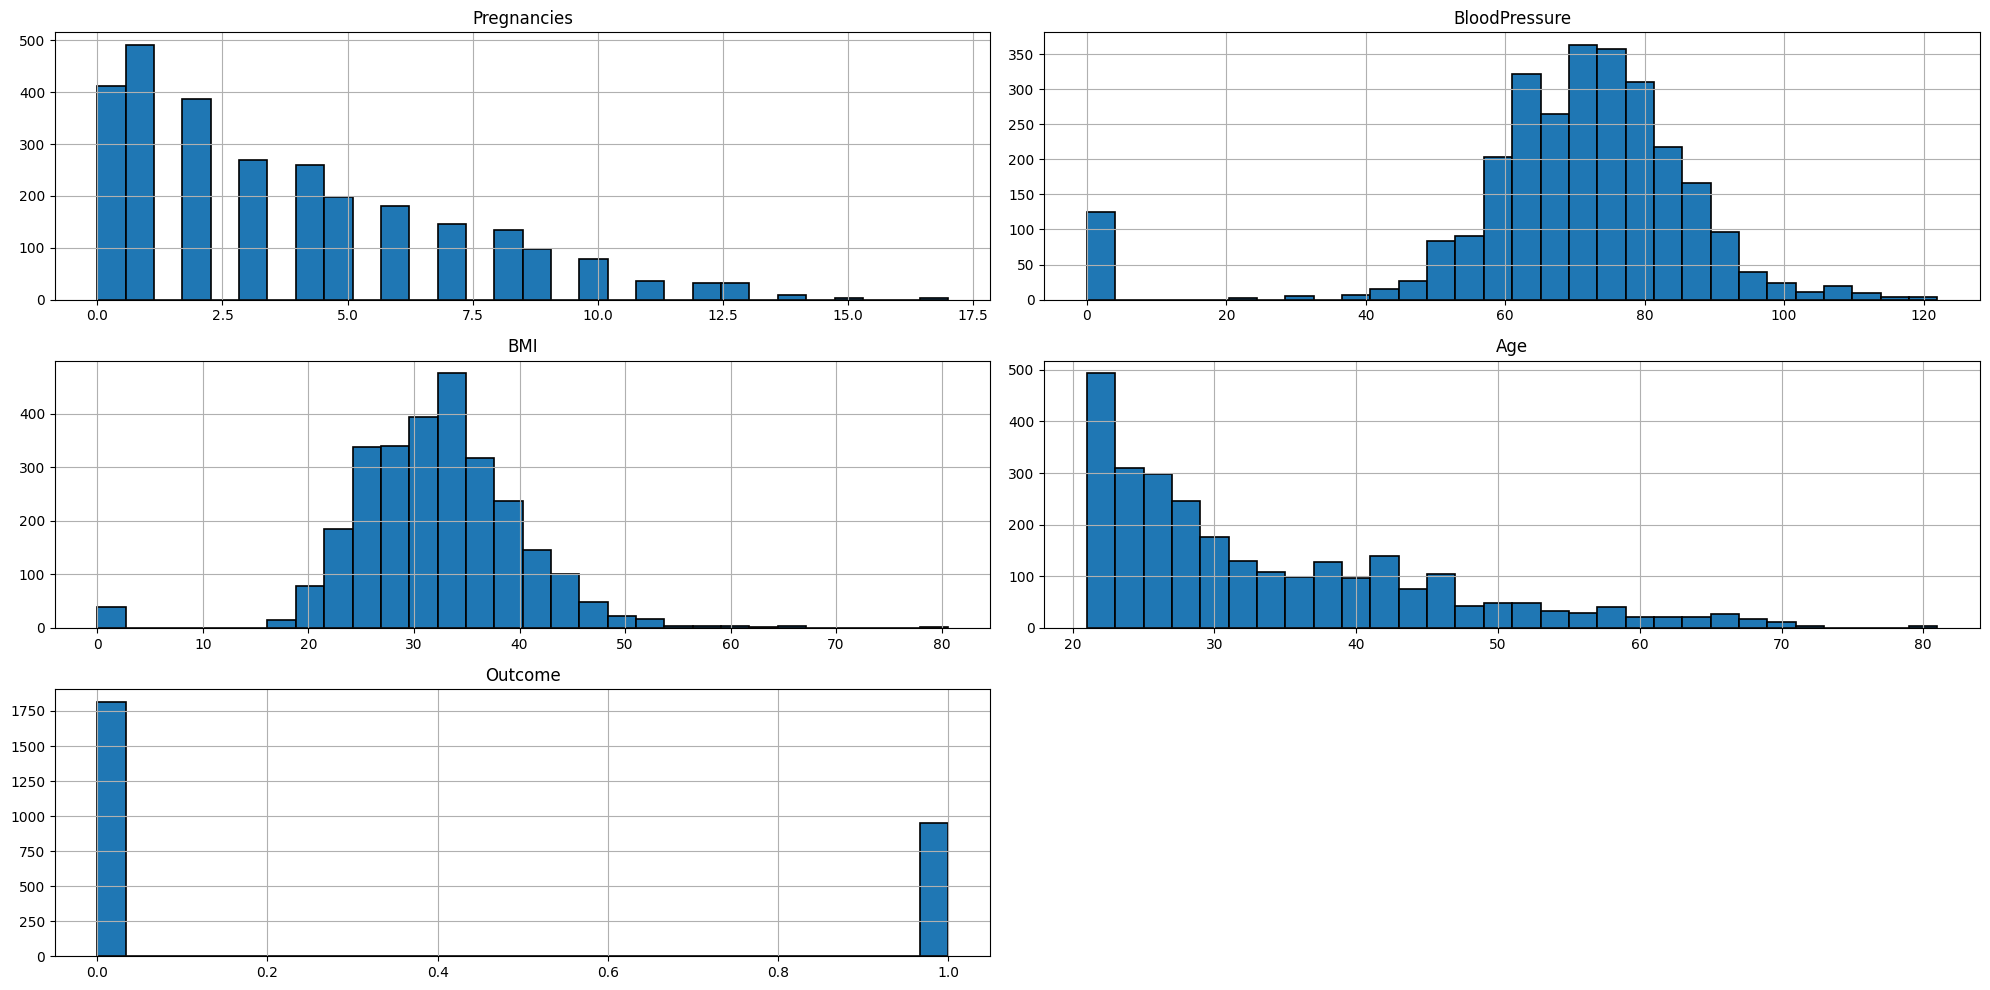

In [39]:
# Check feature distribution

df.hist(figsize=[20,10], bins=30, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

# v We can see that most of our data distribution is imbalanced, this will cause a problem when we try
# to scale the data so we'll need to transform them first

In [40]:
# Look at the coorelation

corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome          1.000000
BMI              0.280928
Age              0.237050
Pregnancies      0.223796
BloodPressure    0.072900
Name: Outcome, dtype: float64

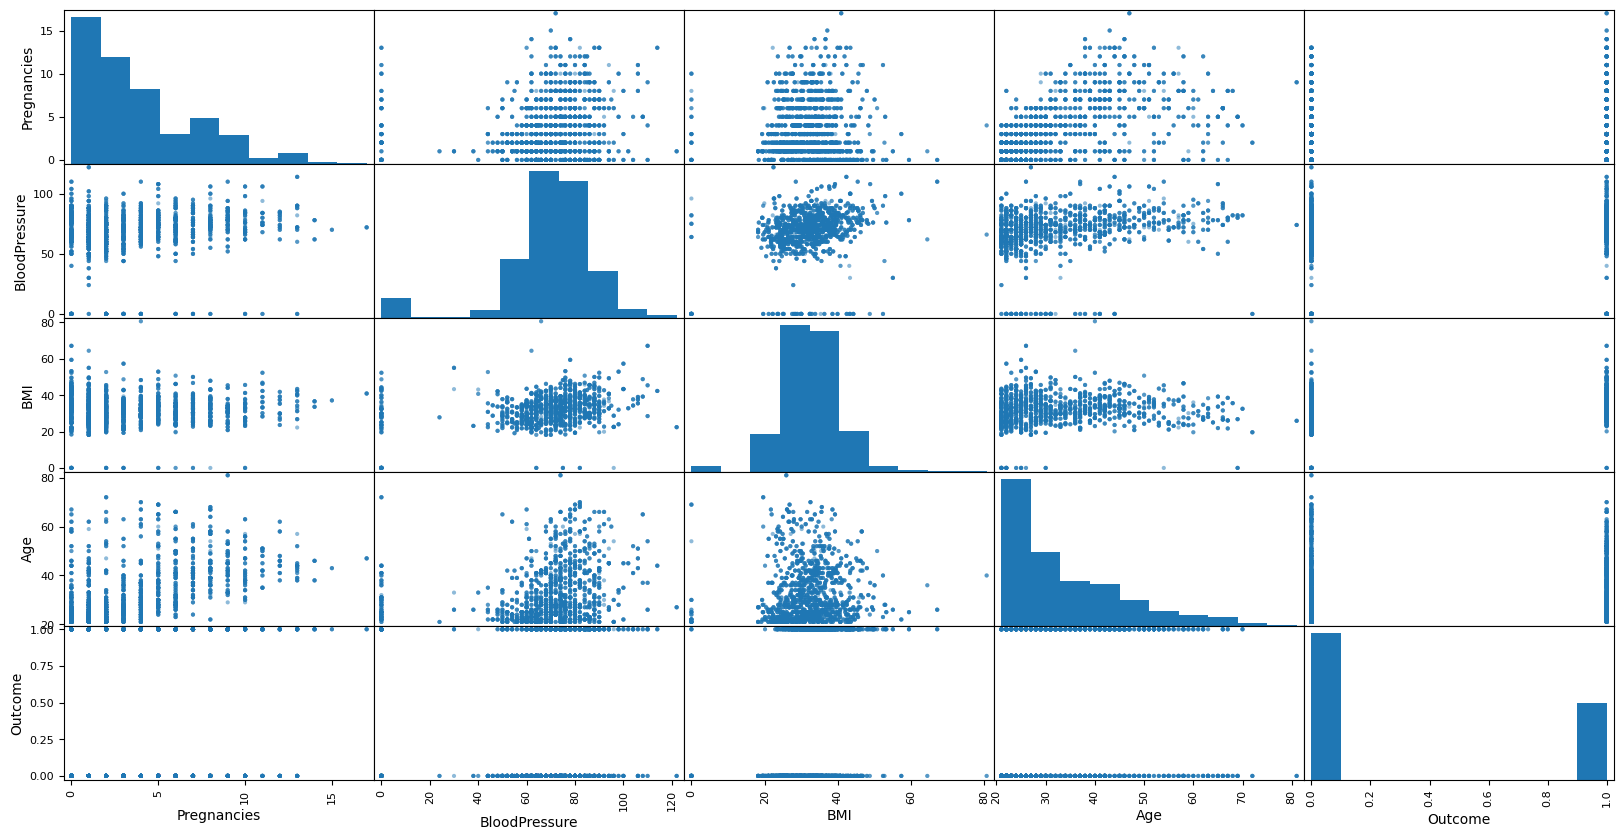

In [41]:
# Plot the distribution

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=[20,10])
plt.show()

# Data Preprocessing

In [42]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df
y = df.pop('Outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts()

Outcome
1    1254
0    1254
Name: count, dtype: int64

In [44]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

We'll test which one is most effective Logistic Regression / KNN / SVM

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6486161251504212
Confusion Matrix:
[[354 208]
 [ 84 185]]


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

max_acc = 0
best_k = 0
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)

  if accuracy > max_acc:
    best_k = i
    max_acc = accuracy

print(i, max_acc)

9 0.9675090252707581


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_model = SVC(kernel='rbf', gamma='scale') 

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6883273164861613
Confusion Matrix:
[[361 201]
 [ 58 211]]


# Export Model

In [48]:
import pickle

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

with open('./model/knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('./model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)